<a href="https://colab.research.google.com/github/Luke-687/Portfolio/blob/main/RandomMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import random
#import numpy as np

In [ ]:
class Swimmer:
  state = []
  action = []
  position = [[0],[0]]
  def __init__ (self, isaction, isstate):
    self.action = isaction
    self.state = isstate

In [ ]:
def optimize (obj):
  #format the average value for each action, return the most appealing one
  completeData = [[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0]]
  numCases = [0,0,0,0,0,0,0,0,0]
  for i in range (0, len(completeData)):
    for j in range (len(obj.action)-21, len(obj.action)):
      if(completeData[i][0] == obj.action[j]):
        completeData[i][1] += obj.state[j]
        numCases[i] += 1
  finalData = [[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0]]
  for i in range (0, len(numCases)):
    if(numCases[i>>0]):
      finalData[i][1] = (completeData[i][1]/numCases[i])
  max = 0
  maxion = 1
  for i in range(0, len(finalData)):
    if(finalData[i][1]>=max):
      max = finalData[i][1]
      maxion = i+1
  setPosition(obj, maxion)
  return maxion

In [ ]:

def setPosition (obj, move):
  if(random.random()<0.25):
    move = random.randint(1,9)
  if(move == 1):
    obj.position[0].append(obj.position[0][-1] -1)
    obj.position[1].append(obj.position[0][-1] +1)
  elif(move ==2):
    obj.position[0].append(obj.position[0][-1] -0)
    obj.position[1].append(obj.position[0][-1] +1)
  elif(move ==3):
    obj.position[0].append(obj.position[0][-1] +1)
    obj.position[1].append(obj.position[0][-1] +1)
  elif(move==4):
    obj.position[0].append(obj.position[0][-1] -1)
    obj.position[1].append(obj.position[0][-1] +0)
  elif(move==5):
    obj.position[0].append(obj.position[0][-1] -0)
    obj.position[1].append(obj.position[0][-1] +0)
  elif(move==6):
    obj.position[0].append(obj.position[0][-1] +1)
    obj.position[1].append(obj.position[0][-1] +0)
  elif(move==7):
    obj.position[0].append(obj.position[0][-1] -1)
    obj.position[1].append(obj.position[0][-1] -1)
  elif(move==8):
    obj.position[0].append(obj.position[0][-1] +0)
    obj.position[1].append(obj.position[0][-1] -1)
  elif(move==9):
    obj.position[0].append(obj.position[0][-1] +1)
    obj.position[1].append(obj.position[0][-1] -1)

#Provide reward to the state of being in new position
  x=obj.position[0][-1]
  y=obj.position[1][-1]
  if((y<=2 and y>=-2)):
    addData(obj, move, random.randint(0,4))
  elif(y>=2 and obj.position[1][-1]<obj.position[1][-2]):
    addData(obj, move, random.randint(8,11))
  elif(y<=-2 and obj.position[1][-1]>obj.position[1][-2]):
    addData(obj, move, random.randint(8,11))
  else:
    addData(obj, move, random.randint(-11,-9))


In [ ]:
def addData (obj, a, s):
  obj.action.append(a)
  obj.state.append(s)

In [ ]:
def reset(obj):
  obj.position[0].append(0)
  obj.position[1].append(0)

In [ ]:
#Define object, position grapher, etc
Example = Swimmer([],[])

In [ ]:
#simulate for basic data:
for i in range(0,100):
  addData(Example, random.randint(1, 9), random.randint(-2, 2))

In [ ]:
#optimize x times:
for i in range(0,5000):
  optimize(Example)



Success defined as remaining within orange bounds:
The percentage success is 43.51129774045191%


Shown is the last 50 steps made, visualizing the optimization as the model is provided more data




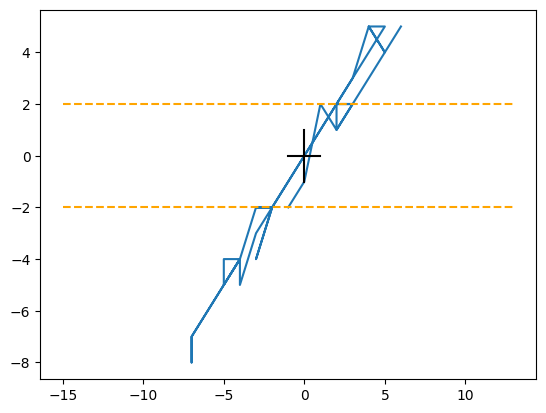

In [ ]:
#graph:
xg=[]
yg=[]
for i in range(len(Example.position[0])-51, len(Example.position[0])-1):
  xg.append(Example.position[0][i])
  yg.append(Example.position[1][i])
plt.plot(xg, yg)

Xx = [-1,0,1]
Xy = [0,0,0]
plt.plot(Xx,Xy, color = 'black')

Yy = [-1,0,1]
Yx = [0,0,0]
plt.plot(Yx,Yy, color = 'black')

#graph bounds
max = 0
min = 0
for i in range (0, len(Example.position[0])-1):
  if(Example.position[0][i]>=max):
    max = Example.position[0][i]
  if(Example.position[0][i]<=min):
    min = Example.position[0][i]
xBound = list(range(min, max+1))
yBound1 = []
yBound2 = []
for i in range(0, len(xBound)):
  yBound1.append(2)
  yBound2.append(-2)

plt.plot(xBound, yBound1, color = 'orange', linestyle = '--')
plt.plot(xBound, yBound2, color = 'orange', linestyle = '--')

#Find success rate:
numSuccess = 0
for i in range(0, len(Example.position[1])-1):
  if(Example.position[1][i]>=-2 and Example.position[1][i]<=2):
    numSuccess+=1
numSuccess/=(len(Example.position[1]))
numSuccess*=100
print("\n")
print("Success defined as remaining within orange bounds:")
print("The percentage success is " +str(numSuccess)+"%")
print("\n")
print("Shown is the last 50 steps made, visualizing the optimization as the model is provided more data")
print("\n")
